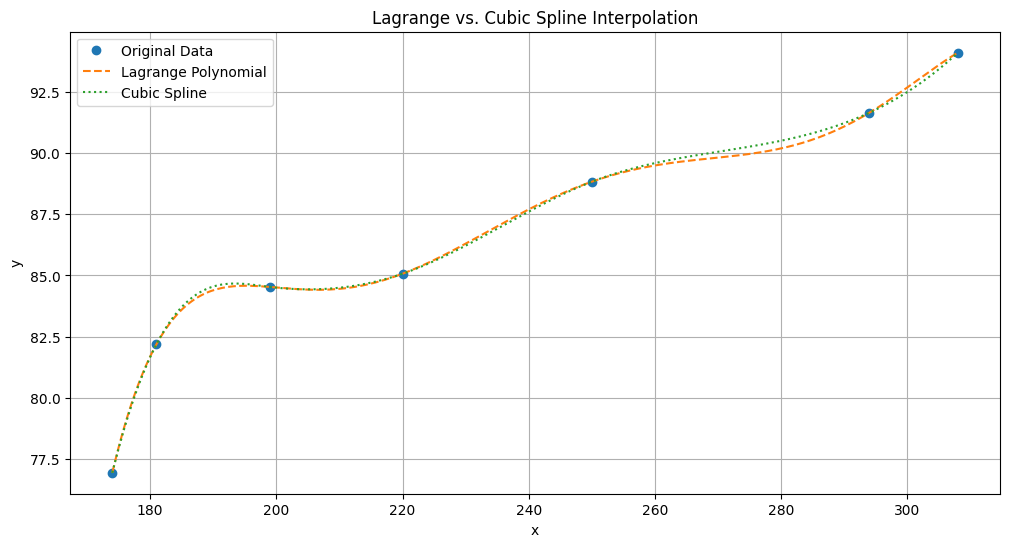

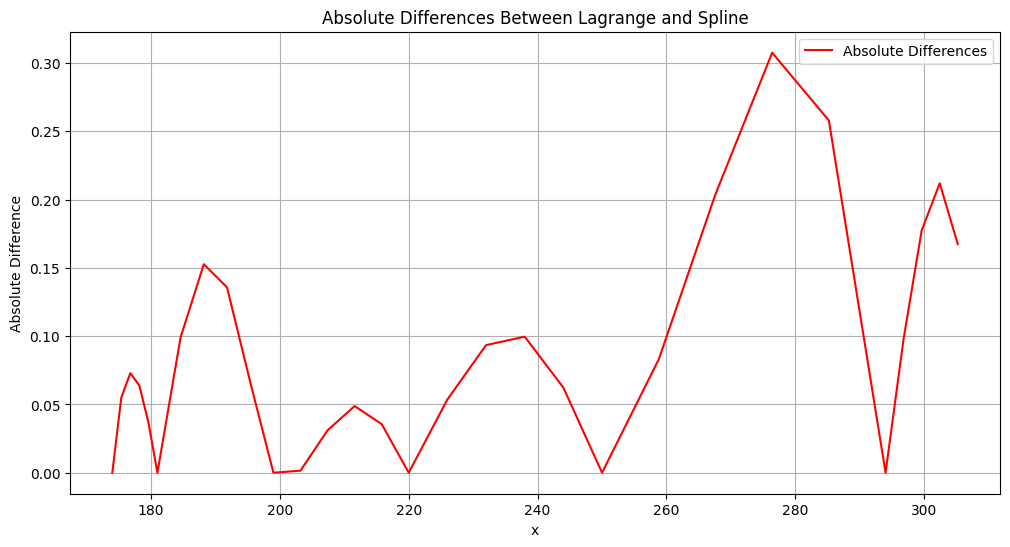

174.00 76.94 76.94 0.00
175.40 78.36 78.30 0.06
176.80 79.57 79.50 0.07
178.20 80.60 80.54 0.06
179.60 81.47 81.43 0.04
181.00 82.19 82.19 0.00
184.60 83.50 83.60 0.10
188.20 84.20 84.36 0.15
191.80 84.51 84.65 0.14
195.40 84.58 84.64 0.07
199.00 84.53 84.53 0.00
203.20 84.44 84.44 0.00
207.40 84.42 84.45 0.03
211.60 84.50 84.55 0.05
215.80 84.72 84.75 0.04
220.00 85.07 85.07 0.00
226.00 85.76 85.71 0.05
232.00 86.58 86.49 0.09
238.00 87.43 87.33 0.10
244.00 88.20 88.14 0.06
250.00 88.83 88.83 0.00
258.80 89.44 89.52 0.08
267.60 89.75 89.95 0.20
276.40 90.02 90.33 0.31
285.20 90.57 90.83 0.26
294.00 91.65 91.65 0.00
296.80 92.11 92.01 0.10
299.60 92.61 92.43 0.18
302.40 93.13 92.91 0.21
305.20 93.64 93.47 0.17


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline

# Data points
x_values = np.array([174, 181, 199, 220, 250, 294, 308])
y_values = np.array([76.94, 82.19, 84.53, 85.07, 88.83, 91.65, 94.1])

# Lagrange interpolation polynomial
lagrange_poly = lagrange(x_values, y_values)

# Cubic spline interpolation
cubic_spline = CubicSpline(x_values, y_values)

# Generate intermediate points
x_interp = np.linspace(x_values[0], x_values[-1], 300)
y_lagrange = lagrange_poly(x_interp)
y_spline = cubic_spline(x_interp)

# Original x points and intermediate points for evaluation
x_eval = []
for i in range(len(x_values) - 1):
    x_eval.append(np.linspace(x_values[i], x_values[i+1], 5, endpoint=False))
x_eval = np.unique(np.concatenate(x_eval))
y_lagrange_eval = lagrange_poly(x_eval)
y_spline_eval = cubic_spline(x_eval)

# Compute differences
abs_diff = np.abs(y_lagrange_eval - y_spline_eval)

# Plot: Original data and interpolations
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, 'o', label='Original Data')
plt.plot(x_interp, y_lagrange, label='Lagrange Polynomial', linestyle='--')
plt.plot(x_interp, y_spline, label='Cubic Spline', linestyle=':')
plt.title('Lagrange vs. Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Plot: Absolute differences
plt.figure(figsize=(12, 6))
plt.plot(x_eval, abs_diff, label='Absolute Differences', color='red')
plt.title('Absolute Differences Between Lagrange and Spline')
plt.xlabel('x')
plt.ylabel('Absolute Difference')
plt.legend()
plt.grid()
plt.show()

for a, b, c, d in zip(x_eval, y_lagrange_eval, y_spline_eval, abs_diff):
    print(f"{a:.2f} {b:.2f} {c:.2f} {d:.2f}")



In [9]:
# Print the Lagrange polynomial equation
lagrange_coeffs = lagrange_poly.coef[::-1]  # Reverse for human-readable format
lagrange_eq = " + ".join(
    f"{coef:.2f}*x^{i}" if i > 0 else f"{coef:.2f}" 
    for i, coef in enumerate(lagrange_coeffs)
)
print("Lagrange Polynomial:\n", lagrange_eq)

# Print the cubic spline equations for each interval
print("\nCubic Spline Polynomials (per interval):")
for i in range(0, len(x_values) - 3):
    c = cubic_spline.c[i]  # Coefficients for the interval
    spline_eq = f"{c[0]:.2f}*x^3 + {c[1]:.2f}*x^2 + {c[2]:.2f}*x + {c[3]:.2f}"
    print(f"Interval [{x_values[i+1]}, {x_values[i+2]}]: {spline_eq}")


Lagrange Polynomial:
 -45131.63 + 1124.19*x^1 + -11.55*x^2 + 0.06*x^3 + -0.00*x^4 + 0.00*x^5 + -0.00*x^6

Cubic Spline Polynomials (per interval):
Interval [181, 199]: 0.00*x^3 + 0.00*x^2 + 0.00*x + -0.00
Interval [199, 220]: -0.05*x^3 + -0.03*x^2 + 0.00*x + 0.00
Interval [220, 250]: 1.03*x^3 + 0.50*x^2 + -0.03*x + 0.09
Interval [250, 294]: 76.94*x^3 + 82.19*x^2 + 84.53*x + 85.07


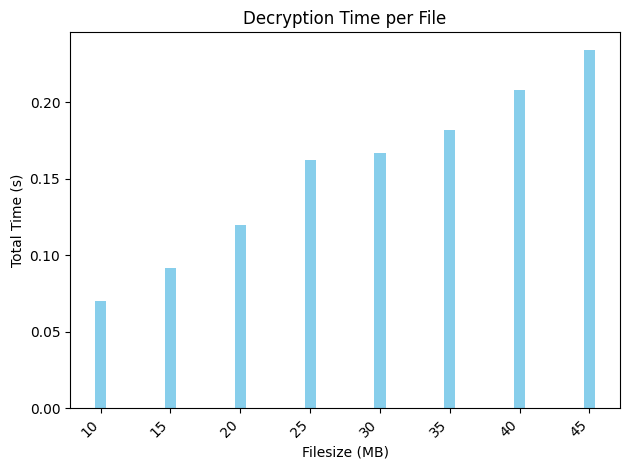

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Завантаження даних з таблиці
times = [0.07, 0.092, 0.120, 0.162, 0.167, 0.182, 0.208, 0.234]
filesizes = [10, 15, 20, 25, 30, 35, 40, 45]
# Побудова гістограми
plt.bar(filesizes, times, color='skyblue')
plt.xlabel('Filesize (MB)')
plt.ylabel('Total Time (s)')
plt.title('Decryption Time per File')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("decryption_histogram.png")
plt.show()


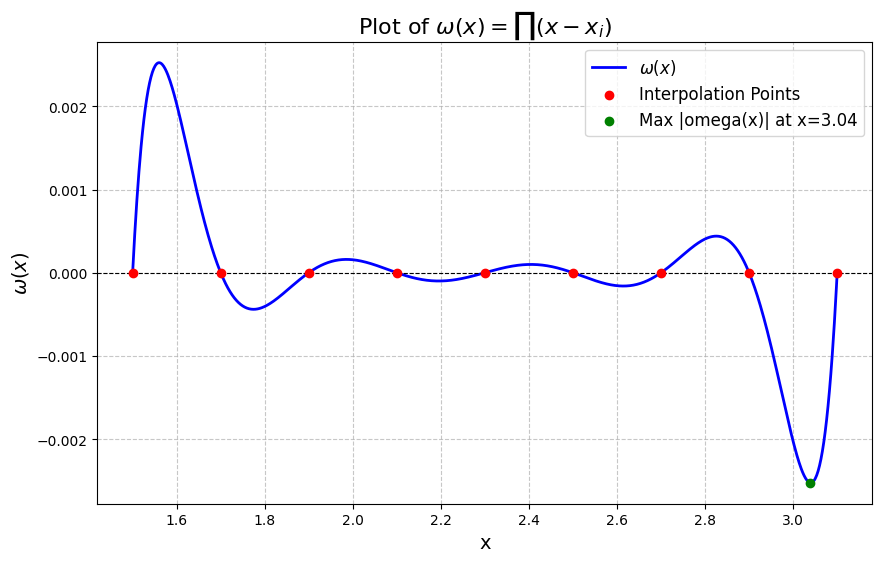

Maximum |omega(x)|: 0.0025234963264801316
Occurs at x = 3.039139139139139


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the interpolation points
interpolation_points = np.array([1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1])

# Define the omega(x) function
def omega(x, interp_points):
    return np.prod([x - xi for xi in interp_points], axis=0)

# Create a dense range of x values for plotting
x_values = np.linspace(1.5, 3.1, 1000)

# Evaluate omega(x) for the x values
omega_values = np.array([omega(x, interpolation_points) for x in x_values])

# Find the maximum absolute value of omega(x)
max_omega = np.max(np.abs(omega_values))
max_x = x_values[np.argmax(np.abs(omega_values))]

# Plot omega(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, omega_values, label="$\\omega(x)$", color='blue', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.scatter(interpolation_points, np.zeros_like(interpolation_points), color='red', label="Interpolation Points", zorder=5)
plt.scatter([max_x], [omega(max_x, interpolation_points)], color='green', label=f"Max |omega(x)| at x={max_x:.2f}", zorder=5)

# Add labels, title, and legend
plt.title("Plot of $\\omega(x) = \\prod(x - x_i)$", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("$\\omega(x)$", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Show the plot
plt.show()

# Print the maximum value and its location
print(f"Maximum |omega(x)|: {max_omega}")
print(f"Occurs at x = {max_x}")

x          f(x)            P(x)            |f(x)-P(x)|    
1.50       -2.40138771     -2.40138771     0.00000000     
1.55       -2.31859789     -2.31859815     0.00000026     
1.70       -2.07622457     -2.07622457     0.00000000     
1.75       -1.99723703     -1.99723699     0.00000004     
1.90       -1.76499893     -1.76499893     0.00000000     
1.95       -1.68902345     -1.68902346     0.00000001     
2.10       -1.46491547     -1.46491547     0.00000000     
2.15       -1.39138498     -1.39138497     0.00000001     
2.30       -1.17394370     -1.17394370     0.00000000     
2.35       -1.10243749     -1.10243750     0.00000000     
2.50       -0.89056209     -0.89056209     0.00000000     
2.55       -0.82075946     -0.82075945     0.00000001     
2.70       -0.61360105     -0.61360105     0.00000000     
2.75       -0.54525191     -0.54525192     0.00000001     
2.90       -0.34214208     -0.34214208     0.00000000     
2.95       -0.27504765     -0.27504760     0.00000005   

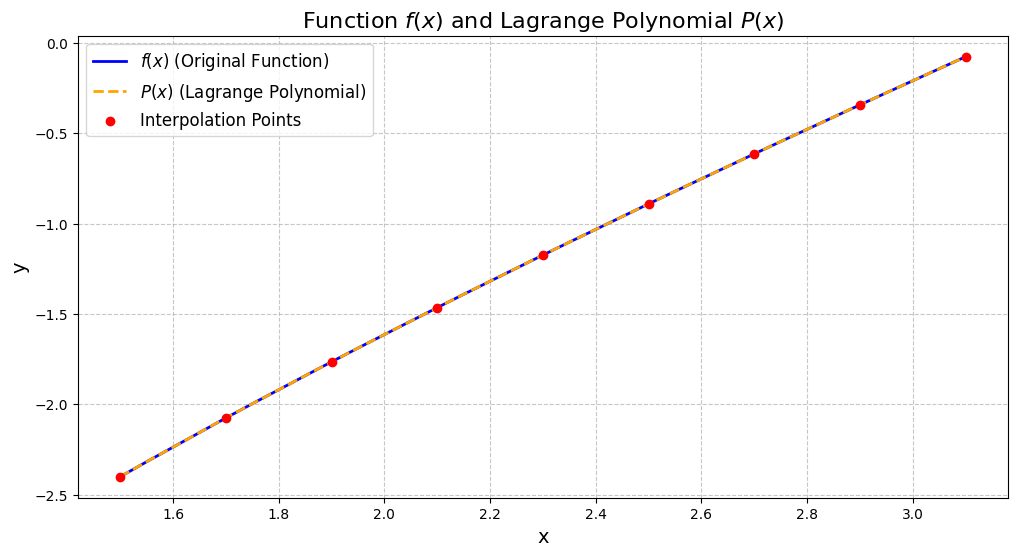

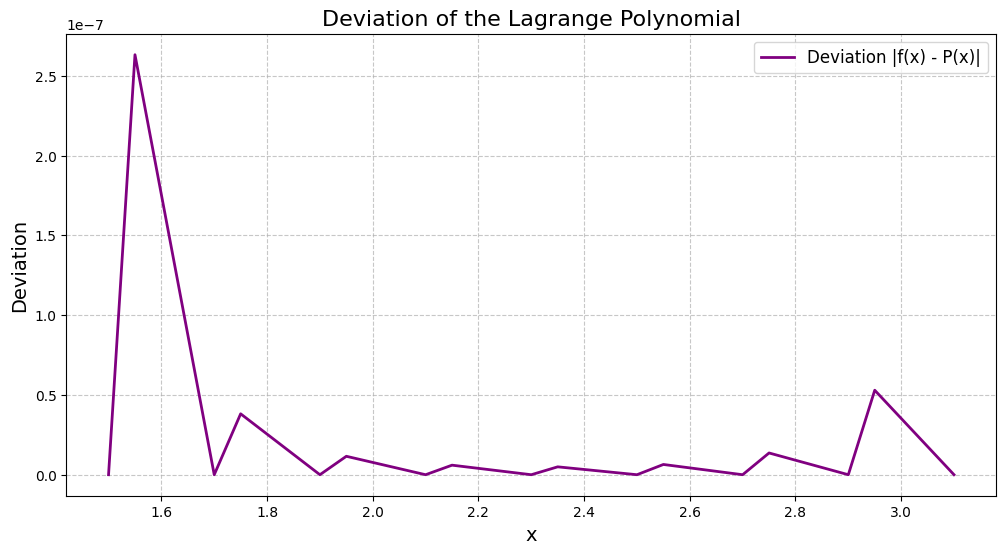

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.log(2 * x) + x - 5

# Define the Lagrange interpolation polynomial
def lagrange_interpolation(x, x_points, y_points):
    n = len(x_points)
    L = np.zeros_like(x, dtype=float)
    for i in range(n):
        term = np.ones_like(x, dtype=float)
        for j in range(n):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        L += term * y_points[i]
    return L

# Interpolation points
interpolation_points = np.array([1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1])
y_values = f(interpolation_points)

# Points to evaluate the deviation
eval_points = np.array([
    1.50, 1.55, 1.70, 1.75, 1.90, 1.95, 2.10, 2.15, 2.30, 2.35,
    2.50, 2.55, 2.70, 2.75, 2.90, 2.95, 3.10
])

# Evaluate the function and polynomial
f_values = f(eval_points)
P_values = lagrange_interpolation(eval_points, interpolation_points, y_values)
deviations = np.abs(f_values - P_values)

# Print the table
print("{:<10} {:<15} {:<15} {:<15}".format("x", "f(x)", "P(x)", "|f(x)-P(x)|"))
for x, fx, Px, dev in zip(eval_points, f_values, P_values, deviations):
    print(f"{x:<10.2f} {fx:<15.8f} {Px:<15.8f} {dev:<15.8f}")

# Plot f(x) and P(x)
plt.figure(figsize=(12, 6))
plt.plot(eval_points, f_values, label="$f(x)$ (Original Function)", color='blue', linewidth=2)
plt.plot(eval_points, P_values, label="$P(x)$ (Lagrange Polynomial)", color='orange', linestyle='--', linewidth=2)
plt.scatter(interpolation_points, y_values, color='red', label="Interpolation Points", zorder=5)
plt.title("Function $f(x)$ and Lagrange Polynomial $P(x)$", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot the deviation
plt.figure(figsize=(12, 6))
plt.plot(eval_points, deviations, label="Deviation |f(x) - P(x)|", color='purple', linewidth=2)
plt.title("Deviation of the Lagrange Polynomial", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Deviation", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()


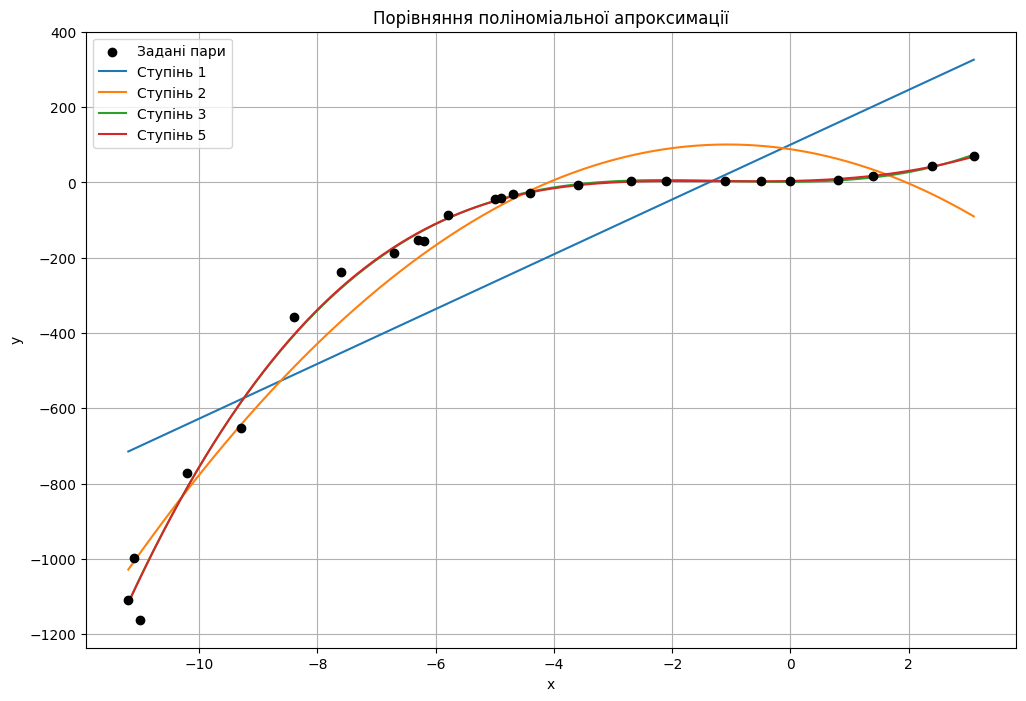

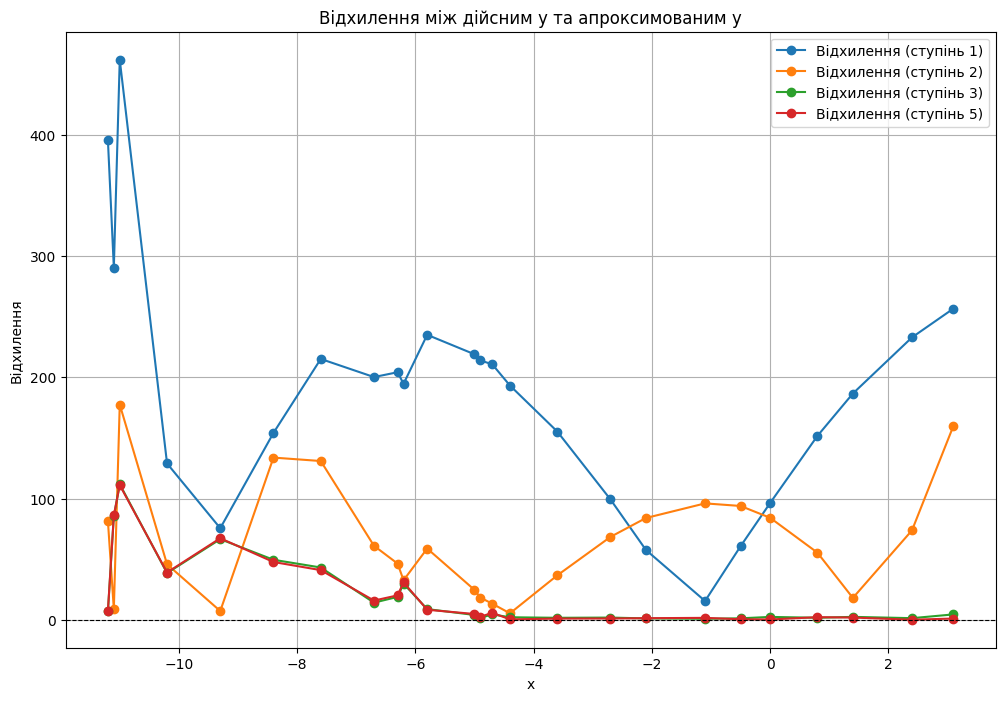

Table for Polynomial of Degree 1:

    x     True y  Poly (deg 1)  Difference (deg 1)
-11.2 -1110.0000      -714.907            -395.093
-11.1  -997.8000      -707.627            -290.173
-11.0 -1162.0000      -700.347            -461.653
-10.2  -771.0000      -642.105            -128.895
 -9.3  -652.1000      -576.584             -75.516
 -8.4  -357.0000      -511.062             154.062
 -7.6  -237.8000      -452.821             215.021
 -6.7  -187.2000      -387.299             200.099
 -6.3  -154.1000      -358.178             204.078
 -6.2  -156.4000      -350.898             194.498
 -5.8   -86.8600      -321.778             234.918
 -5.0   -44.6600      -263.536             218.876
 -4.9   -42.4800      -256.256             213.776
 -4.7   -31.0600      -241.696             210.636
 -4.4   -26.7400      -219.855             193.115
 -3.6    -6.3890      -161.614             155.225
 -2.7     3.1408       -96.092              99.233
 -2.1     5.1731       -52.411              57.

In [6]:
# Adjusted code to format numbers and add a differences plot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Given data points
x = np.array([-11.2, -11.1, -11, -10.2, -9.3, -8.4, -7.6, -6.7, -6.3, -6.2, -5.8, -5, -4.9,
              -4.7, -4.4, -3.6, -2.7, -2.1, -1.1, -0.5, 0, 0.8, 1.4, 2.4, 3.1])
y = np.array([-1110, -997.8, -1162, -771, -652.1, -357, -237.8, -187.2, -154.1, -156.4, 
              -86.86, -44.66, -42.48, -31.06, -26.74, -6.389, 3.1408, 5.1731, 4.8623, 
              3.464, 4.2169, 7.148, 15.865, 42.408, 69.646])

# Degree of polynomials
degrees = [1, 2, 3, 5]

# Fit polynomials and evaluate at x values
polynomials = {deg: np.poly1d(np.polyfit(x, y, deg)) for deg in degrees}

# Prepare tables and plots
comparison_data = []
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='black', label='Задані пари', zorder=5)

# Differences plot data
differences_plot_data = {}

for deg, poly in polynomials.items():
    y_pred = poly(x)
    difference = y - y_pred
    differences_plot_data[deg] = np.absolute(difference)
    
    # Append data for table with 3 decimal precision
    comparison_data.append(pd.DataFrame({
        'x': x,
        'True y': y,
        f'Poly (deg {deg})': np.round(y_pred, 3),
        f'Difference (deg {deg})': np.round(difference, 3)
    }))
    
    # Plot polynomial
    x_smooth = np.linspace(min(x), max(x), 500)
    y_smooth = poly(x_smooth)
    plt.plot(x_smooth, y_smooth, label=f'Ступінь {deg}')

plt.title('Порівняння поліноміальної апроксимації')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Plot differences
plt.figure(figsize=(12, 8))
for deg, diff in differences_plot_data.items():
    plt.plot(x, diff, label=f'Відхилення (ступінь {deg})', marker='o')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Відхилення між дійсним y та апроксимованим y')
plt.xlabel('x')
plt.ylabel('Відхилення')
plt.legend()
plt.grid(True)
plt.show()

# Print tables for each polynomial
for deg, data in zip(degrees, comparison_data):
    print(f"Table for Polynomial of Degree {deg}:\n")
    print(data.to_string(index=False))
    print("\n" + "="*80 + "\n")
